# Intro to Probability & Statistics

#### TODO:
1. Descriptive Statistics:
    * Calculate statistics such as Mode, Mean, Median and Standard Deviation of weight and age. Do they respond to any known distribution?
    * Carry out an analysis of outliers and missing values.
    * Explain how the metrics vary when we breakdown the dataset by gender. Do they respond to any known distribution? Qualitatively and graphically compare both distributions.
2. Calculate the marginal and joint probability, and the correlation between two other variables, for example alcohol consumption and smoking.
    * Visually represent the joint probability between the possible values of the chosen variables.
3. Answer the following questions: What would happen to smoking levels if smoking is banned in bars? What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?

In [1]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [2]:
young = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/people_responses.csv')

In [3]:
young.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


*****
## 1. Descriptive statistics

In [8]:
young.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [17]:
print(
    f'Describe function:\n\n'
    f'{round(young[["Weight","Age"]].describe(),1)}\n\n'
    f'Median:\n'
    f'{young[["Weight","Age"]].median()}\n\n'
    f'Mode:\n'
    f'{young[["Weight","Age"]].mode()}'
    )

Describe function:

       Weight     Age
count   990.0  1003.0
mean     66.4    20.4
std      13.8     2.8
min      41.0    15.0
25%      55.0    19.0
50%      64.0    20.0
75%      75.0    22.0
max     165.0    30.0

Median:
Weight    64.0
Age       20.0
dtype: float64

Mode:
   Weight   Age
0    60.0  19.0


### Frequency Distribution by Age and Weight

In [19]:
print(
    f'Frecuency distribution by Age:\n'
    f'{young["Age"].value_counts()}\n\n' 
    f'Frecuency distribution by Weight:\n'
    f'{young["Weight"].value_counts()}\n'     
    )

Frecuency distribution by Age:
19.0    210
20.0    194
21.0    127
18.0    123
22.0     84
17.0     53
23.0     47
25.0     30
16.0     29
24.0     28
28.0     17
26.0     15
27.0     14
15.0     11
29.0     11
30.0     10
Name: Age, dtype: int64

Frecuency distribution by Weight:
60.0     76
55.0     62
70.0     51
80.0     50
65.0     49
         ..
111.0     1
41.0      1
103.0     1
101.0     1
105.0     1
Name: Weight, Length: 69, dtype: int64



### Histogram

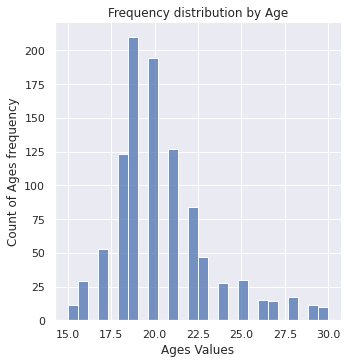

In [7]:
agefreq_hist=sns.displot(data=young,x='Age').set(title= "Frequency distribution by Age").set_axis_labels("Ages Values", "Count of Ages frequency")

### Missing values

In [21]:
def missing_values(df):
    """
    Create a dataframe with NaN and empty values. Both with features indicating
    the sum on NaN or Empty values and corresponding percentage of total.
    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe to analize NaN and empty values.
    Returns
    -------
    Print both dataframes.
    """

    # build a dataframe with nan values by headers
    nan = pd.DataFrame(df.isna().sum(), columns=["NaN Values"])

    # calculate percentage
    nan["% of NaN"] = round(nan["NaN Values"] / (df.shape[0]), 4) * 100

    # sort values descending
    nan = nan.sort_values(by="% of NaN", ascending=False)

    # build a dataframe with empty values by headers
    empty = pd.DataFrame(df.eq(" ").sum(), columns=["Empty Values"])

    # calculate percentage
    empty["% of empty"] = round(empty["Empty Values"] / (df.shape[0]), 4) * 100

    # sort values descending
    empty = empty.sort_values(by="% of empty", ascending=False)

    # print features with nan values
    return print(
        f'{nan[nan["% of NaN"]>0]}\n\n' f'{empty[empty["% of empty"]>0]}'
    )

In [22]:
missing_values(young)

                  NaN Values  % of NaN
Height                    20      1.98
Weight                    20      1.98
Passive sport             15      1.49
Chemistry                 10      0.99
Geography                  9      0.89
...                      ...       ...
Keeping promises           1      0.10
Politics                   1      0.10
Storm                      1      0.10
Law                        1      0.10
Fake                       1      0.10

[144 rows x 2 columns]

Empty DataFrame
Columns: [Empty Values, % of empty]
Index: []


### Outliers

### Gender breakdown

### Correlation between variables

****
## 2. Joint probability

#### To do this we will define the concepts of marginal probability and joint probability

Marginal Probability: Probability of one variable without considering another, for example:

$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

#### Joint Probability: In a bivariate or multimavariate sample space, each possible outcome refers to two or more characteristics. Then the probability of a joint outcome is denoted $P(X \cap Y)$ and is defined as:

$$P_{XY}=P[(X=x)\cap(Y=y)]$$

__TODO:__
Do some research on [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) pandas function.

****
## 3. Answers
### Smoking levels and smoking bans in bars

****
# Extras:

## Other data visualizations

#### We choose some characteristics (numerical) and analyze them breaking down by gender using a box plot